In [82]:
import pandas as pd
import numpy as np
from plotnine import *
%run filtering.ipynb
pd.options.display.max_rows = 100

In [83]:
## Import dataset into dataframe.
## It's very clean already.
%matplotlib inline
df = pd.read_csv('Airline_Delay_Cause.csv')

We inspect the flight records overall and near the beginning of the Covid 19 pandemic. We will focus on time columns, total arrivals, total minutes delayed, airport, and carrier. We define a new unit, delayed minutes per total arrivals to inspect the ratio of those two variables

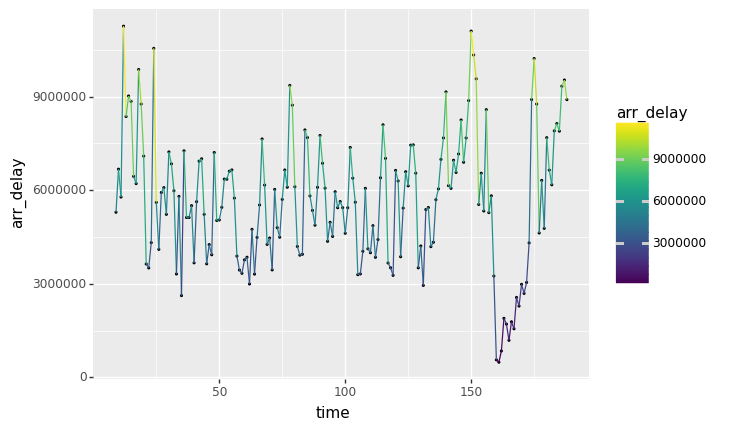

<ggplot: (8785786456619)>

In [89]:
## We first look at plots for total minutes delayed over the whole data set
plotTLinead(9, 188, df)


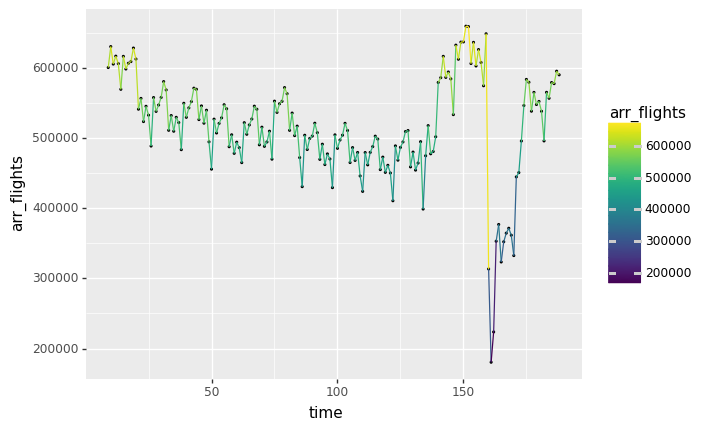

<ggplot: (8785826386002)>

In [90]:
## Next, we look at plots for total arrivals per month

plotTLineaf(9,188,df)

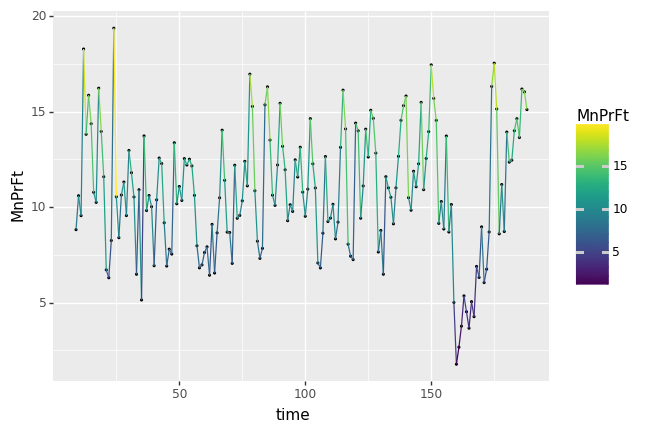

<ggplot: (8785775159625)>

In [91]:
## Finally, we look at the plot of minutes delayed over flight arrivals
plotTLinempf(9,188,df)

There's a fairly clear impact around time = 160 (i.e. April 2020). All 3 experience a drop. The fact that the MnPrFt (delayed minutes/total arrivals) lowered at this time as well implies that the number of delayed minutes fell at a faster rate than the number of arrivals fell (i.e. in ratio to prior value).

We now look at different airports.

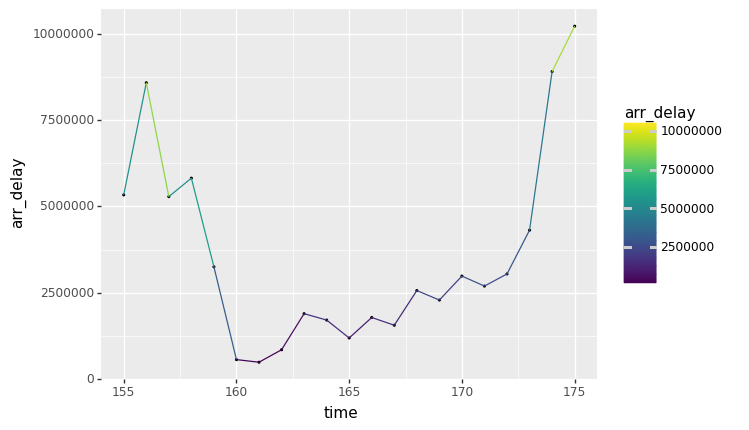

<ggplot: (8785776445401)>

In [92]:
## We first look at plots for total minutes delayed over the whole data set
plotTLinead(155, 175, df)

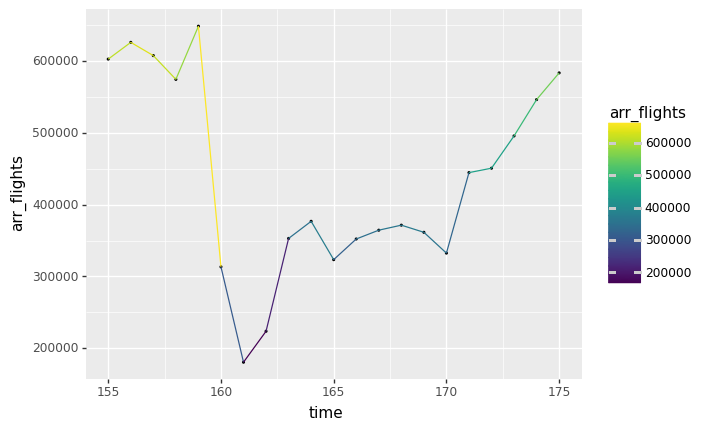

<ggplot: (8785776450407)>

In [93]:
## Next, we look at plots for total arrivals per month

plotTLineaf(155,175,df)

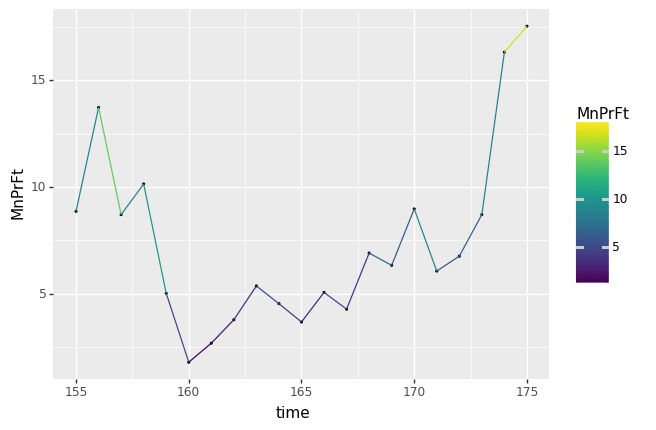

<ggplot: (8785786426956)>

In [94]:
## Finally, we look at the plot of minutes delayed over flight arrivals
plotTLinempf(155,175,df)

These results indicate that the total minutes of delay lowered more (in a sense relative to the prior value) than the total arrivals lowered. 

We now look at how specific airports fared. The results will indicate which airlport experience the most delay (restricted to the airports with the most arrivals). Knowing this can tell a traveler which airports might be good to avoid.

We start with some bar plots, then we show some line plots again.



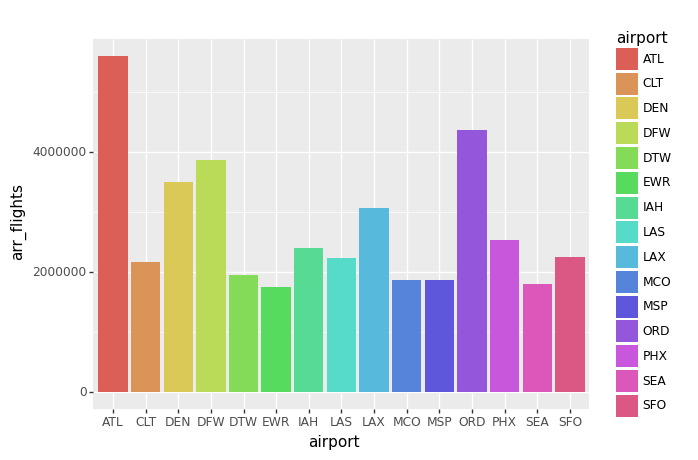

<ggplot: (8785826898661)>

In [98]:
## Airports with most delayed minutes since September 2007
plotairTopNad(9, 188, df,15)


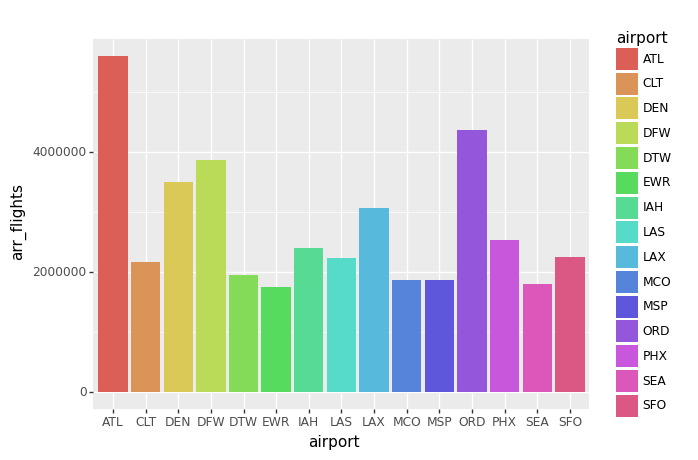

<ggplot: (8785783791876)>

In [99]:
## Airports with most arrivals since September 2007
plotairTopNaf(9, 188, df,15)

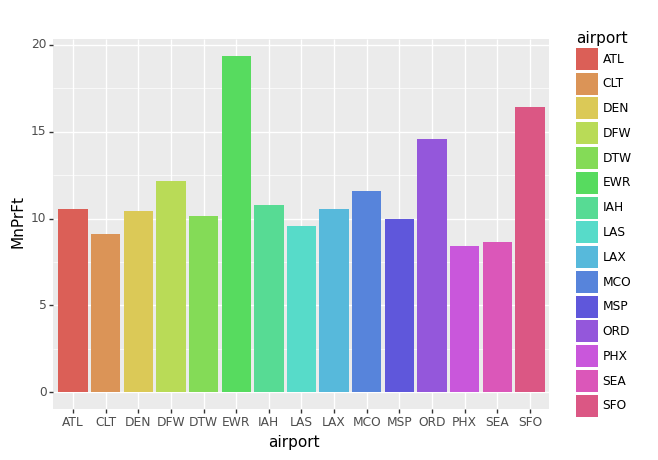

<ggplot: (8785838224710)>

In [100]:
## Airports with highest MnPrFt since September 2007
plotairTopNmpf(9, 188, df,15)

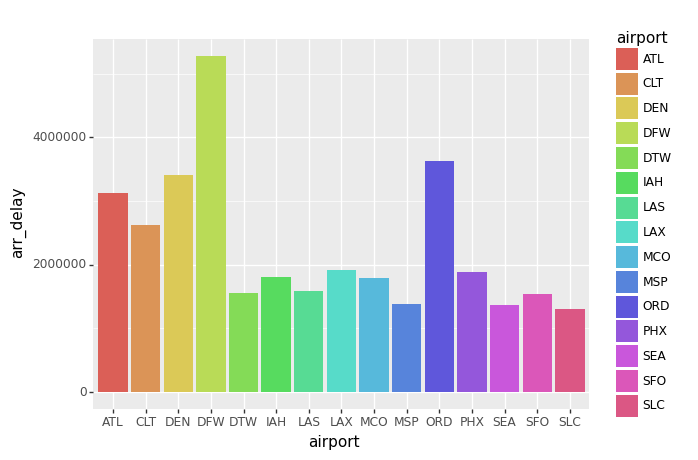

<ggplot: (8785792002919)>

In [101]:
## Airports with most delayed minutes around April 2020
plotairTopNad(155, 175, df,15)

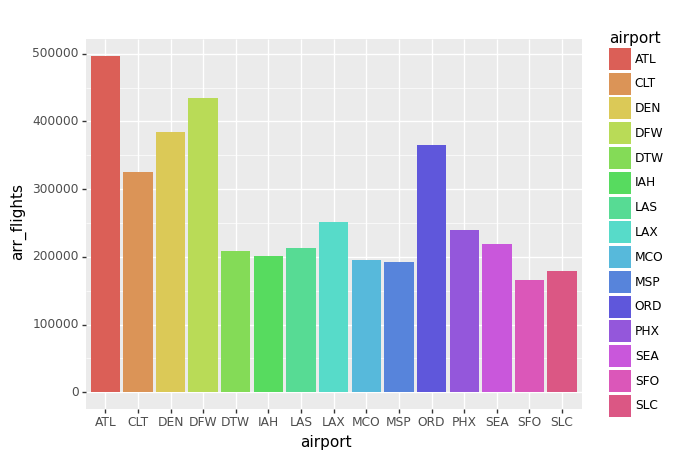

<ggplot: (8785776918447)>

In [102]:
## Airports with most arrivals around April 2020
plotairTopNaf(155, 175, df,15)

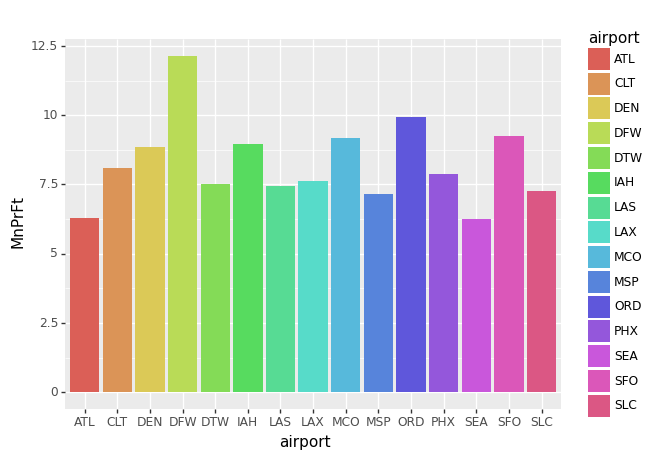

<ggplot: (8785860853218)>

In [103]:
## Airports with highest MnPrFt around April 2020
plotairTopNmpf(155, 175, df,15)

We now focus near April 2020 (when time is 160). We look at the corresponding values above over time.

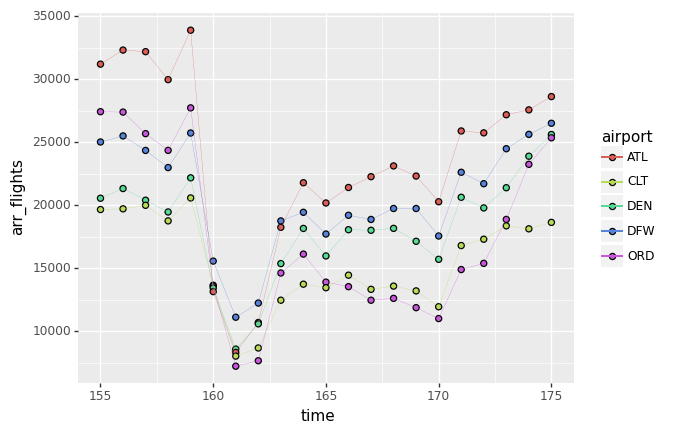

<ggplot: (8785776915050)>

In [104]:
plotairOTaf(155,175, df, 5)

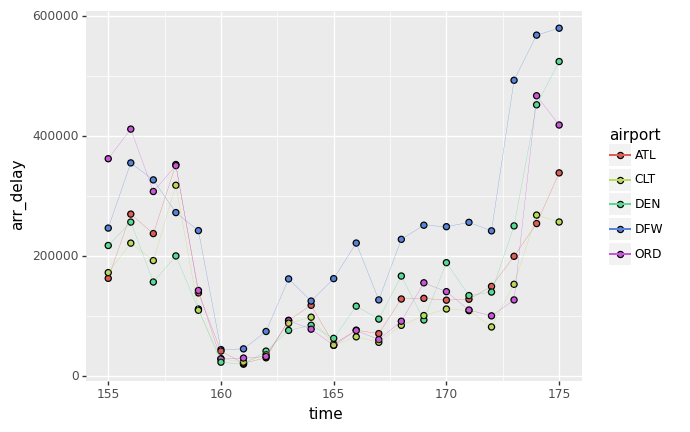

<ggplot: (8785776915062)>

In [105]:
plotairOTad(155,175, df, 5)

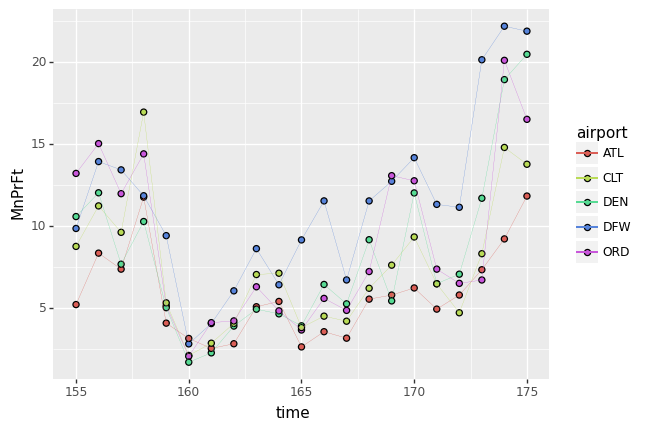

<ggplot: (8785826276048)>

In [107]:
plotairOTmpf(155,175, df, 5)

We can perform the same analyses with respect to carrier instead of airport as well. We focus on the time near April 2020.

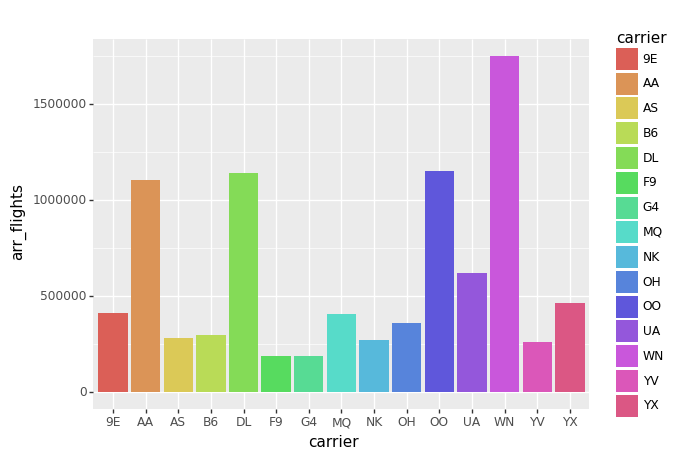

<ggplot: (8785776798675)>

In [108]:
plotcarTopNaf(155,175, df, 15)

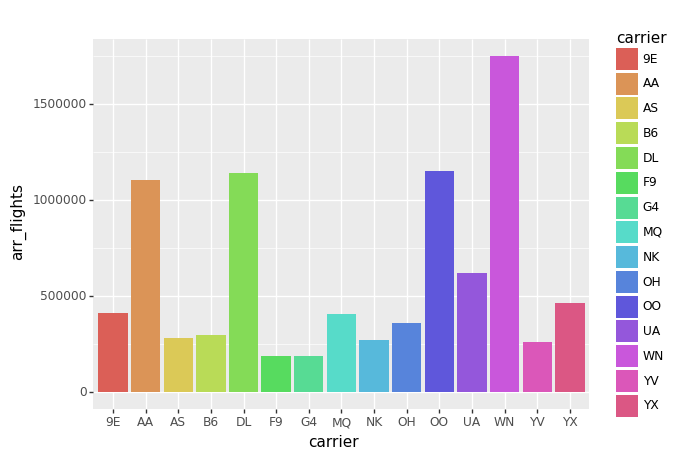

<ggplot: (8785861133951)>

In [109]:
plotcarTopNaf(155,175, df, 15)

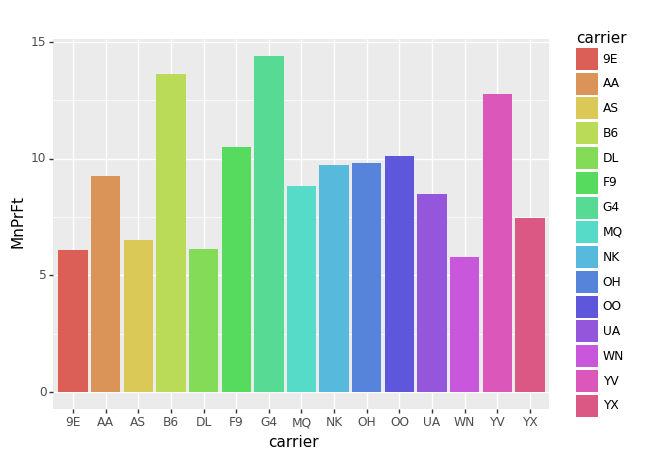

<ggplot: (8785792350853)>

In [110]:
plotcarTopNmpf(155,175, df, 15)

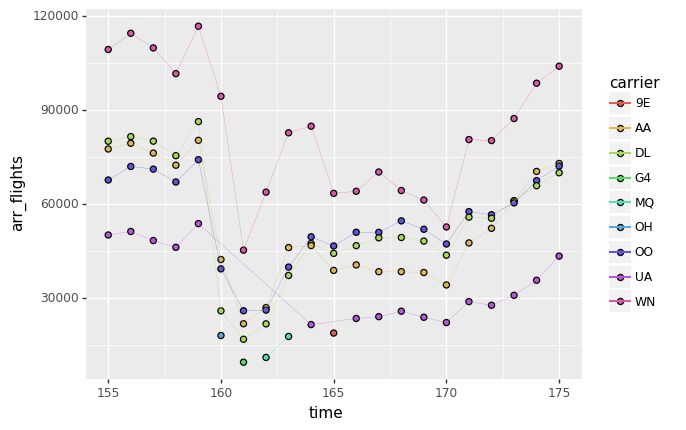

<ggplot: (8785792101723)>

In [111]:
plotcarOTaf(155,175, df, 5)

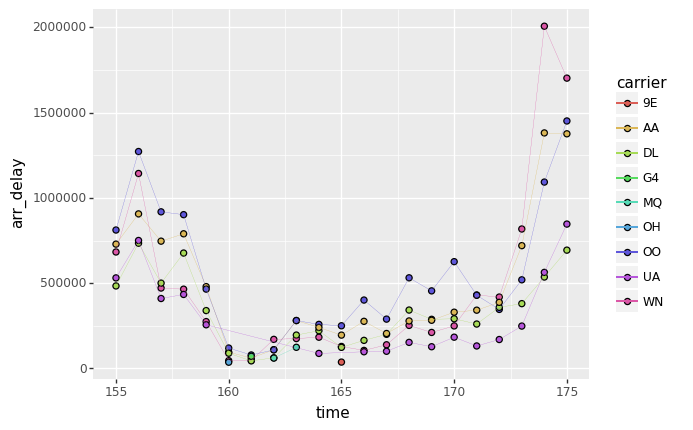

<ggplot: (8785777495263)>

In [112]:
plotcarOTad(155,175, df, 5)

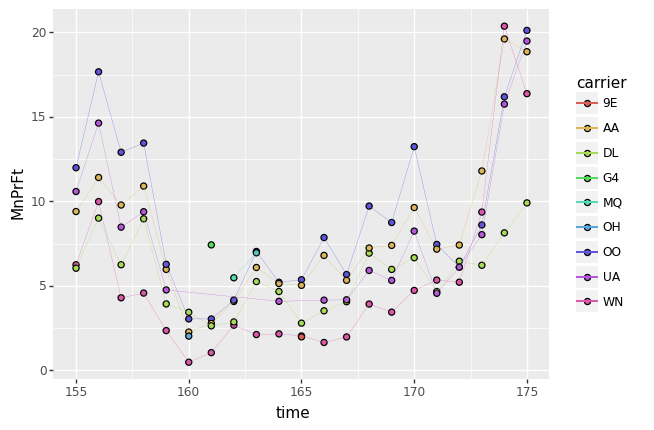

<ggplot: (8785826281716)>

In [113]:
plotcarOTmpf(155,175, df, 5)

Of the 